In [20]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# Loading the dataset
heart_data = pd.read_csv('/content/heart.csv')

# Exploring the dataset
print("First 5 rows of the dataset:")
print(heart_data.head())


First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [16]:
print("\nDataset shape:")
print(heart_data.shape)


Dataset shape:
(303, 14)


In [17]:
print("\nDataset info:")
heart_data.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
print("\nChecking for missing values:")
print(heart_data.isnull().sum())

print("\nStatistical summary of the dataset:")
print(heart_data.describe())

print("\nTarget value counts:")
print(heart_data['target'].value_counts())

# Splitting features and target
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

# Printing the features and target
print("\nFeature set (X):")
print(X)

print("\nTarget variable (Y):")
print(Y)



Checking for missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Statistical summary of the dataset:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.00000

In [13]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print("\nDataset shapes:")
print(f"Full dataset: {X.shape}")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print("\nAccuracy on training data:", training_data_accuracy)

# Evaluating the model on testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Accuracy on testing data:", test_data_accuracy)

# Generating a classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, X_test_prediction))


# Making a prediction for a single input
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)

# Convert input data to a DataFrame with column names matching the training data
input_data_df = pd.DataFrame([input_data], columns=X.columns)

# Standardize the input data
input_data_scaled = scaler.transform(input_data_df)

# Making a prediction
prediction = model.predict(input_data_scaled)
print("\nPrediction result:", prediction)

# Interpreting the result
if prediction[0] == 0:
    print("The person does NOT have heart disease.")
else:
    print("The person HAS heart disease.")


Dataset shapes:
Full dataset: (303, 13)
Training set: (242, 13)
Testing set: (61, 13)

Accuracy on training data: 0.8471074380165289
Accuracy on testing data: 0.7868852459016393

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61


Prediction result: [0]
The person does NOT have heart disease.



Confusion Matrix:
[[22  6]
 [ 7 26]]


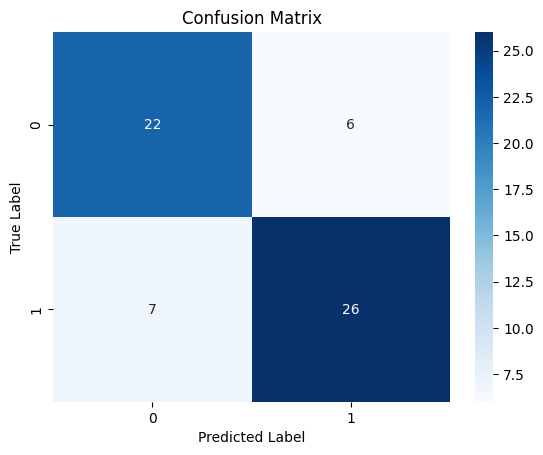

In [11]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, X_test_prediction))
conf_matrix = confusion_matrix(y_test, X_test_prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

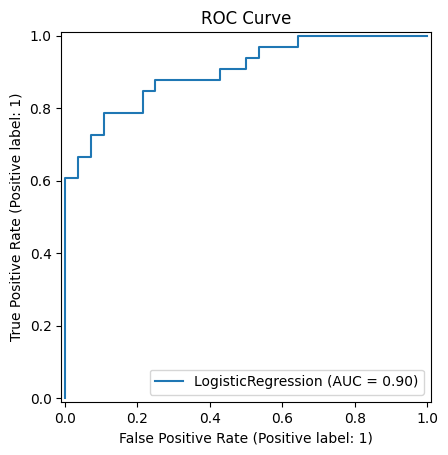

In [10]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()